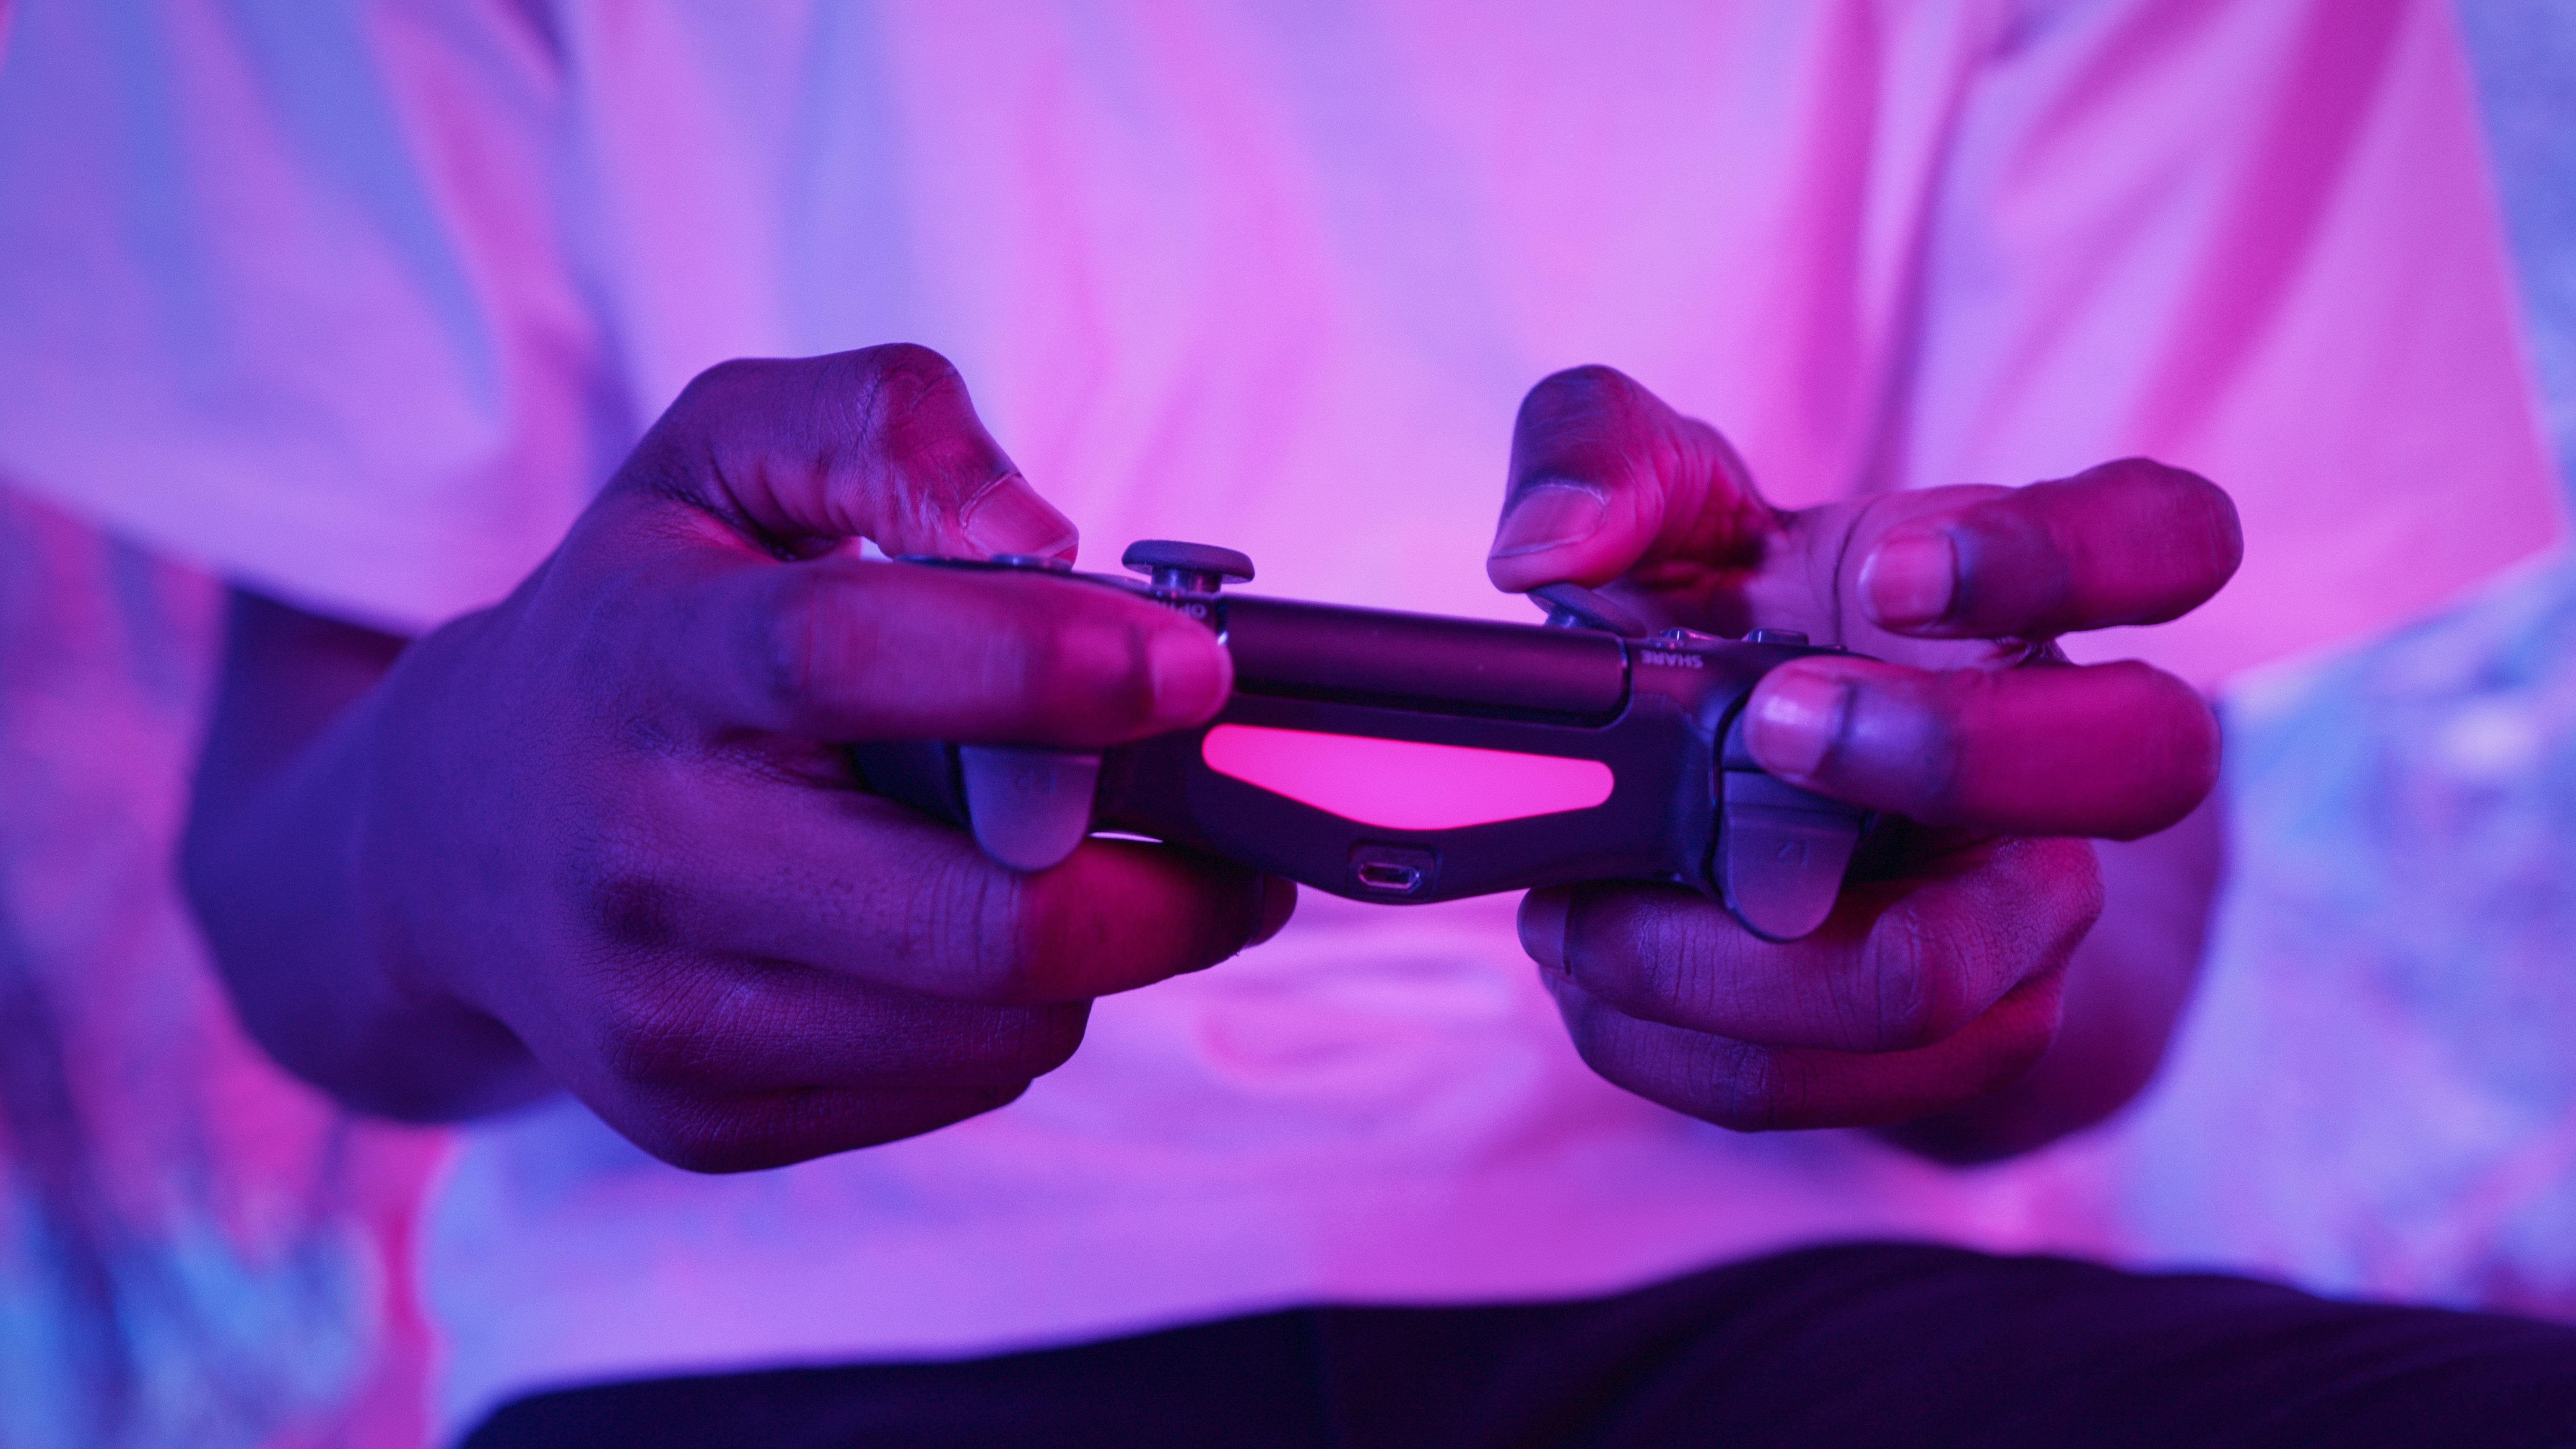

**ANALYZING GOOGLE PLAY STORE DATA**

As a part of my Data Analytics Internship at Oasis Infobyte, I have used two datasets from Kaggle related to over 9000 apps from 20+ categories, along with the reviews of apps for this analysis.  The datasets I have used are :

1. ***apps.csv:*** It contains 14 columns pertaining to the apps listed on Google Play Store

2. ***user_reviews.csv***: It contains 5 columns pertaining to the reviews received by each app and the corresponding sentiment.

The columns present in apps.csv are as follows:
1. Unnamed: 0
2. App
3. Category
4. Rating
5. Reviews
6. Size
7. Installs
8. Type
9. Price
10. Content Rating
11. Genres
12. Last Updated
13. Current Ver
14. Android Ver

The columns present in user_reviews.csv are as follows:
1. App
2. Translated_Review
3. Sentiment
4. Sentiment_Polarity
5. Sentiment_Subjectivity

I have followed the steps given below to analyze this data:
1. Initial Data Exploration
2. Data Cleaning
3. Feature Engineering
4. Descriptive Statistics
5. Data Visualization
6. Data Analysis

**Link to the dataset:**  https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play

**INITIAL DATA EXPLORATION**

In [255]:
import pandas as pd
import string
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [256]:
df1=pd.read_csv("apps.csv")

In [257]:
df2=pd.read_csv("user_reviews.csv")

In [258]:
df1.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [259]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [260]:
df1.shape

(9659, 14)

In [261]:
df2.shape

(64295, 5)

In [262]:
df1.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [263]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [264]:
df1.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [265]:
df2.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [267]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [268]:
df1.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [269]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [270]:
df1.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [271]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

**DATA CLEANING**

In [272]:
df1=df1.dropna(subset=['Current Ver'])

In [273]:
df1=df1.dropna(subset=['Android Ver'])

In [274]:
df1["Rating"].mean()

4.173321123321124

In [275]:
df1['Rating'].fillna(value=df1["Rating"].mean(),inplace=True)

In [276]:
df1['Size'].mean()

20.41398717644265

In [277]:
df1['Size'].fillna(value=df1['Size'].mean(),inplace=True)

In [278]:
df1.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [279]:
df1.shape

(9649, 14)

In [280]:
df1=df1.drop(['Unnamed: 0'],axis=1)

In [281]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [282]:
punc=string.punctuation

In [283]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [284]:
def decimal(text):
  clean_text=""
  for i in text:
    if i =='.':
      clean_text=clean_text+""
    else:
      clean_text=clean_text+""+i
  return clean_text

In [285]:
punc=decimal(punc)

In [286]:
def punctuation_remove(text):
  clean_text=""
  for i in text:
    if i in punc:
      clean_text=clean_text+" "
    else:
      clean_text=clean_text+""+i
  return clean_text



In [287]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [288]:
df1['App']=df1['App'].apply(punctuation_remove)
df1['Category']=df1['Category'].apply(punctuation_remove)
df1['Installs']=df1['Installs'].apply(punctuation_remove)
df1['Genres']=df1['Genres'].apply(punctuation_remove)
df1['Last Updated']=df1['Last Updated'].apply(punctuation_remove)
df1['Price']=df1['Price'].apply(punctuation_remove)

In [289]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ART AND DESIGN,4.1,159,19.0,10 000,Free,0,Everyone,Art Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500 000,Free,0,Everyone,Art Design Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide ...,ART AND DESIGN,4.7,87510,8.7,5 000 000,Free,0,Everyone,Art Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch Draw Paint,ART AND DESIGN,4.5,215644,25.0,50 000 000,Free,0,Teen,Art Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100 000,Free,0,Everyone,Art Design Creativity,June 20 2018,1.1,4.4 and up


In [290]:
def to_lower(text):
  return(text.lower())


In [291]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [292]:
df1['App']=df1['App'].apply(to_lower)
df1['Category']=df1['Category'].apply(to_lower)
df1['Installs']=df1['Installs'].apply(to_lower)
df1['Price']=df1['Price'].apply(to_lower)
df1['Genres']=df1['Genres'].apply(to_lower)
df1['Last Updated']=df1['Last Updated'].apply(to_lower)
df1['Type']=df1['Type'].apply(to_lower)
df1['Content Rating']=df1['Content Rating'].apply(to_lower)
df1['Current Ver']=df1['Current Ver'].apply(to_lower)
df1['Android Ver']=df1['Android Ver'].apply(to_lower)

In [293]:
df1.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9656,parkinson exercices fr,medical,4.173321,3,9.500000,1 000,free,0,everyone,medical,january 20 2017,1,2.2 and up
9657,the scp foundation db fr nn5n,books and reference,4.500000,114,20.413987,1 000,free,0,mature 17+,books reference,january 19 2015,varies with device,varies with device
9658,ihoroscope 2018 daily horoscope astrology,lifestyle,4.500000,398307,19.000000,10 000 000,free,0,everyone,lifestyle,july 25 2018,varies with device,varies with device


In [294]:
def remove_space(text):
  clean_text=""
  for i in text:
    if i==" ":
      clean_text=clean_text+""
    else:
      clean_text=clean_text+i
  return clean_text

In [295]:
df1['Installs']=df1['Installs'].apply(remove_space)

In [296]:
df1=df1.astype({"Installs":int})

In [297]:
df1=df1.astype({'Price':float})

In [298]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [299]:
df1['Last Updated']

0        january 7  2018
1       january 15  2018
2         august 1  2018
3           june 8  2018
4          june 20  2018
              ...       
9654       july 25  2017
9655        july 6  2018
9656    january 20  2017
9657    january 19  2015
9658       july 25  2018
Name: Last Updated, Length: 9649, dtype: object

In [300]:
df1[["Month","Day" ,"Extra_Column","Year"]]=(df1['Last Updated'].str.split(" ",expand=True))

In [301]:
df1[["Month","Day" ,"Extra_Column","Year"]]

,Month,Day,Extra_Column,Year
0,january,7,,2018
1,january,15,,2018
2,august,1,,2018
3,june,8,,2018
4,june,20,,2018
...,...,...,...,...
9654,july,25,,2017
9655,july,6,,2018
9656,january,20,,2017
9657,january,19,,2015


In [302]:
df1=df1.drop(["Extra_Column"],axis=1)

In [303]:
df1['Month'].unique()

array(['january', 'august', 'june', 'march', 'april', 'september', 'july',
       'october', 'november', 'may', 'december', 'february'], dtype=object)

In [304]:
def month_convert(text):
  if text=="january":
    return "1"
  elif text=="february":
    return "2"
  elif text=="march":
    return "3"
  elif text=="april":
    return "4"
  elif text=="may":
    return "5"
  elif text=="june":
    return "6"
  elif text=="july":
    return "7"
  elif text=="august":
    return "8"
  elif text=="september":
    return "9"
  elif text=="october":
    return "10"
  elif text=="november":
    return "11"
  else:
    return "12"


In [305]:
df1['Month']=df1['Month'].apply(month_convert)

In [306]:
df1[["Month"]]

,Month
0,1
1,1
2,8
3,6
4,6
...,...
9654,7
9655,7
9656,1
9657,1


In [307]:
df1['Inter Date']=""

In [308]:
df1["Inter Date"]=df1['Day']+"/"+df1['Month']+"/"+df1['Year']

In [309]:
try:
  df1['Inter Date'] = pd.to_datetime(df1['Inter Date'], format='%d/%m/%Y')
except ValueError:
  df1['Inter Date'] = pd.to_datetime(df1['Inter Date'],errors='coerce')

In [310]:
df1['Inter Date']

0      2018-01-07
1      2018-01-15
2      2018-08-01
3      2018-06-08
4      2018-06-20
          ...    
9654   2017-07-25
9655   2018-07-06
9656   2017-01-20
9657   2015-01-19
9658   2018-07-25
Name: Inter Date, Length: 9649, dtype: datetime64[ns]

In [311]:
df1=df1.astype({'Year':int})

In [312]:
df1=df1.astype({'Month':int})

In [313]:
df1=df1.drop(['Last Updated'],axis=1)

In [314]:
df1=df1.drop(['Day'],axis=1)

In [315]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Month', 'Year', 'Inter Date'],
      dtype='object')

In [316]:
new_names={"App":"app_name",
           "Category":"category",
           "Rating":"rating",
           "Reviews":"num_reviews",
           "Size":"size",
           "Installs":"num_installs",
           "Type":"type",
           "Price":"price",
           "Content Rating":"content_rating",
           "Genres":"genres",
           "Current Ver":"current_version",
           "Android Ver":"android_ver",
           "Month":"month",
           "Year":"year",
           "Inter Date":"last_update_date"}

In [317]:
df1=df1.rename(columns=new_names)

In [318]:
df1.columns

Index(['app_name', 'category', 'rating', 'num_reviews', 'size', 'num_installs',
       'type', 'price', 'content_rating', 'genres', 'current_version',
       'android_ver', 'month', 'year', 'last_update_date'],
      dtype='object')

In [319]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [320]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [321]:
df2['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [322]:
df2['Sentiment'].mode()

0    Positive
Name: Sentiment, dtype: object

In [323]:
df2['Translated_Review'].mode()

0    Good
Name: Translated_Review, dtype: object

In [324]:
df2[df2['Translated_Review']=="Good"]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
40,10 Best Foods for You,Good,Positive,0.7,0.6
78,10 Best Foods for You,Good,Positive,0.7,0.6
79,10 Best Foods for You,Good,Positive,0.7,0.6
140,10 Best Foods for You,Good,Positive,0.7,0.6
178,10 Best Foods for You,Good,Positive,0.7,0.6
...,...,...,...,...,...
63921,HotelTonight: Book amazing deals at great hotels,Good,Positive,0.7,0.6
64112,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.7,0.6
64113,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.7,0.6
64114,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.7,0.6


In [325]:
df2['Translated_Review'].fillna("Good",inplace=True)

In [326]:
df2['Sentiment'].fillna("Positive",inplace=True)

In [327]:
df2['Sentiment_Polarity'].fillna(0.7,inplace=True)

In [328]:
df2['Sentiment_Subjectivity'].fillna(0.6,inplace=True)

In [329]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Good,Positive,0.70,0.600000
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [330]:
def remove_stopwords(text):
  token_text=word_tokenize(text)
  filter_text=[word for word in token_text if word.lower() not in stopwords.words("english")]
  clean_text=' '.join(filter_text)
  return clean_text

In [331]:
df2['Translated_Review']=df2['Translated_Review'].apply(remove_stopwords)

In [332]:
df2[["Translated_Review"]]

,Translated_Review
0,"like eat delicious food . 's 'm cooking food ,..."
1,help eating healthy exercise regular basis
2,Good
3,Works great especially going grocery store
4,Best idea us
...,...
64290,Good
64291,Good
64292,Good
64293,Good


In [333]:
df2['Translated_Review']=df2['Translated_Review'].apply(punctuation_remove)

In [334]:
df2['Translated_Review']=df2['Translated_Review'].apply(to_lower)
df2['App']=df2['App'].apply(to_lower)
df2['Sentiment']=df2['Sentiment'].apply(to_lower)

In [335]:
new_names={'App':'app_name',
           'Translated_Review':'review_text',
           'Sentiment':'sentiment',
           'Sentiment_Polarity':'polarity',
           'Sentiment_Subjectivity':'subjectivity'
           }

In [336]:
df2=df2.rename(columns=new_names)

**FEATURE ENGINEERING**

In [337]:
df2['opinion_type']=""

In [338]:
def opinion(num):
  if num<=0.5:
    return "objective"
  else:
    return "subjective"

In [339]:
df2['opinion_type']=df2['subjectivity'].apply(opinion)

In [340]:
df1['average_price_per_category']=df1.groupby(['category'])['price'].transform("mean")

In [341]:
df1['average_price_per_type']=df1.groupby(['type'])['price'].transform("mean")

In [342]:
df1['average_price_per_content_rating']=df1.groupby(['content_rating'])['price'].transform("mean")

In [343]:
df1['average_price_per_genres']=df1.groupby(['genres'])['price'].transform("mean")

In [344]:
df1['average_num_reviews_per_category']=df1.groupby(['category'])['num_reviews'].transform("mean")

In [345]:
df1['average_num_reviews_per_type']=df1.groupby(['type'])['num_reviews'].transform("mean")

In [346]:
df1['average_num_reviews_per_content_rating']=df1.groupby(['content_rating'])['num_reviews'].transform("mean")

In [347]:
df1['average_num_reviews_per_genre']=df1.groupby(['genres'])['num_reviews'].transform("mean")

In [348]:
df1['average_rating_per_category']=df1.groupby(['category'])['rating'].transform("mean")

In [349]:
df1['average_rating_per_type']=df1.groupby(['type'])['rating'].transform("mean")

In [350]:
df1['average_rating_per_content_rating']=df1.groupby(['content_rating'])['rating'].transform("mean")

In [351]:
df1['average_rating_per_genre']=df1.groupby(['genres'])['rating'].transform("mean")

In [352]:
df1['average_size_per_category']=df1.groupby(['category'])['size'].transform("mean")

In [353]:
df1['average_size_per_type']=df1.groupby(['type'])['size'].transform("mean")

In [354]:
df1['average_size_per_content_rating']=df1.groupby(['content_rating'])['size'].transform("mean")

In [355]:
df1['average_size_per_genre']=df1.groupby(['genres'])['size'].transform("mean")

In [356]:
df1['average_num_install_per_category']=df1.groupby(['category'])['num_installs'].transform("mean")

In [357]:
df1['average_num_install_per_type']=df1.groupby(['type'])['num_installs'].transform("mean")

In [358]:
df1['average_num_install_per_content_rating']=df1.groupby(['content_rating'])['num_installs'].transform("mean")

In [359]:
df1['average_num_install_per_genre']=df1.groupby(['genres'])['num_installs'].transform("mean")

**DESCRIPTIVE STATISTICS**

In [360]:
df1['category'].mode()

0    family
Name: category, dtype: object

Family emerges as the most popular category

In [361]:
df1['type'].mode()

0    free
Name: type, dtype: object

Most of the apps belong to the "free" category

In [362]:
df1['content_rating'].mode()

0    everyone
Name: content_rating, dtype: object

Most of the apps belong to the "everyone" category i.e suitable for all ages

In [363]:
df1['genres'].mode()

0    tools
Name: genres, dtype: object

Many of the apps listed in the dataset are from tools genre

In [364]:
df1['rating'].mean()

4.173321123321123

The average rating of apps is 4.17

In [365]:
df1['rating'].max()

5.0

Maximum rating given to an app is 5.0

In [366]:
df1['rating'].min()

1.0

Minimum Rating given to an app is 1.0

In [367]:
df1['num_installs'].sum()

75121360417

The total number of installation is 75121360417

In [368]:
df1['num_installs'].mean()

7785403.71199088

The average number of installations is 7785404 roughly

In [369]:
df1['num_installs'].max()

1000000000

Maximum Number of Installations for a particular app is 1000000000

In [370]:
df1['num_installs'].min()

0

Minimum Number of Installations for a particular app is 0

In [371]:
df1['num_reviews'].sum()

2092042713

Total number of reviews of all apps is 2092042713

In [372]:
df1['num_reviews'].mean()

216814.45880402115

The average number of reviews is 216814

In [373]:
df1['size'].mean()

20.41398717644265

The average size of each app listed is 20.41 MB

In [374]:
df1['size'].max()

100.0

The maximum size for a particular app is 100 MB

In [375]:
df1['size'].min()

0.0

The minimum size for a particular app is 0 MB

In [376]:
df1['price'].mean()

1.1000787646388226

The mean price for apps listed is 1.1 USD

In [377]:
df1['price'].max()

400.0

The maximum price for an app listed is 400 USD

In [378]:
df1['price'].min()

0.0

The minimum price for an app listed is 0 USD

In [379]:
df2['sentiment'].mode()

0    positive
Name: sentiment, dtype: object

Most of the reviews are positive

In [380]:
df1=df1.sort_values('rating',ascending=False)

In [381]:
df1[['app_name','rating']].head(20)

,app_name,rating
7487,disciple maker’s dm lab,5.0
6225,cf townsville,5.0
4525,ap art history flashcards,5.0
5696,bs mobile,5.0
5695,comsats book store for bs cs,5.0
9163,safe santa fe,5.0
4541,aq ria retail,5.0
4542,accounting quiz aq malaysia,5.0
4544,wowkwis aq ka qaquj,5.0
9155,comunidad de fe minitries,5.0


these are the Top 20 apps with highest ratings

In [382]:
df1=df1.sort_values('rating',ascending=True)

In [383]:
df1[['app_name','rating']].head(20)

,app_name,rating
7703,ds creator 2.0,1.0
9228,familial hypercholesterolaemia handbook,1.0
4986,truck driving test class 3 bc,1.0
6747,cr magazine,1.0
6100,cb mobile biz,1.0
524,house party live chat,1.0
5479,mbh bm,1.0
9416,lottery ticket checker florida results lotto,1.0
9153,fe mechanical engineering prep,1.0
6336,thistletown ci,1.0


These are the 20 of the most low rated apps

**DATA VISUALIZATION**

In [384]:
import matplotlib.pyplot as plt

In [385]:
import seaborn as sns

In [386]:
df1=df1.sort_values(by='rating')

Text(0.5, 1.0, 'Distribution of ratings')

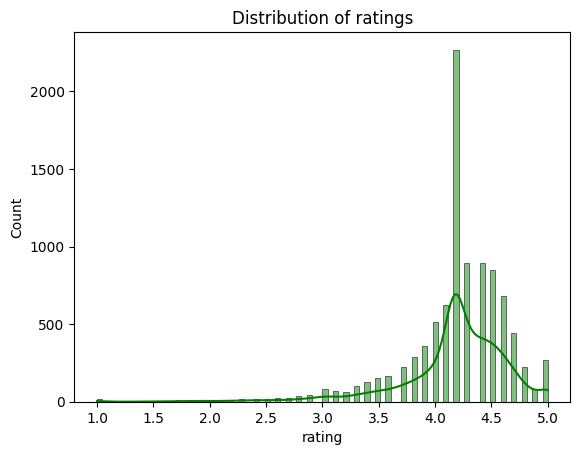

In [387]:
sns.histplot(df1['rating'],kde=True,color="green")
plt.title("Distribution of ratings")

Text(0.5, 1.0, 'Distribution of Price')

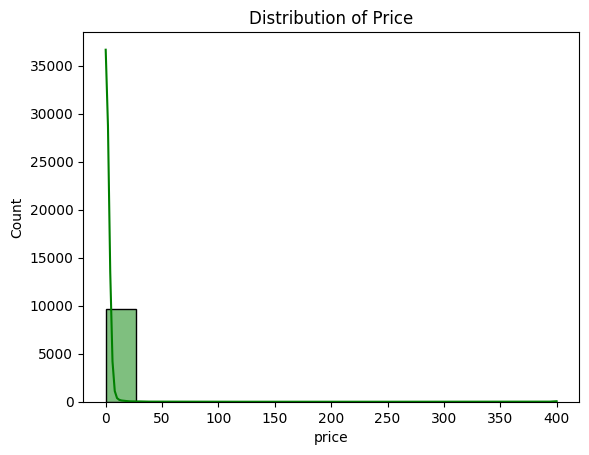

In [388]:
sns.histplot(x=df1['price'],color="green",kde=True)
plt.title("Distribution of Price")

Text(0.5, 1.0, 'Distribution of Size')

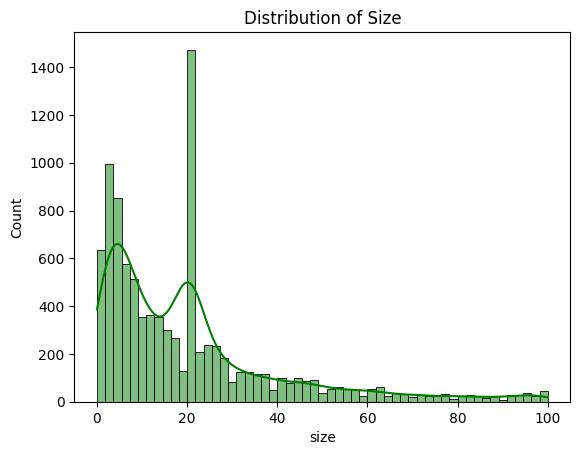

In [389]:
sns.histplot(x=df1['size'],color="green",kde=True)
plt.title("Distribution of Size")

<ipython-input-390-0cf90dbb41e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['category'],palette="crest")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'tools'),
  Text(1, 0, 'medical'),
  Text(2, 0, 'game'),
  Text(3, 0, 'communication'),
  Text(4, 0, 'family'),
  Text(5, 0, 'finance'),
  Text(6, 0, 'productivity'),
  Text(7, 0, 'dating'),
  Text(8, 0, 'business'),
  Text(9, 0, 'health and fitness'),
  Text(10, 0, 'sports'),
  Text(11, 0, 'lifestyle'),
  Text(12, 0, 'shopping'),
  Text(13, 0, 'food and drink'),
  Text(14, 0, 'news and magazines'),
  Text(15, 0, 'video players'),
  Text(16, 0, 'social'),
  Text(17, 0, 'maps and navigation'),
  Text(18, 0, 'parenting'),
  Text(19, 0, 'photography'),
  Text(20, 0, 'auto and vehicles'),
  Text(21, 0, 'travel and local'),
  Text(22, 0, 'personalization'),
  Text(23, 0, 'books and reference'),
  Text(24, 0, 'house and home'),
  Text(25, 0, 'comics'),
  Text(26, 0, 'events'),
  Text(27, 0, 'e

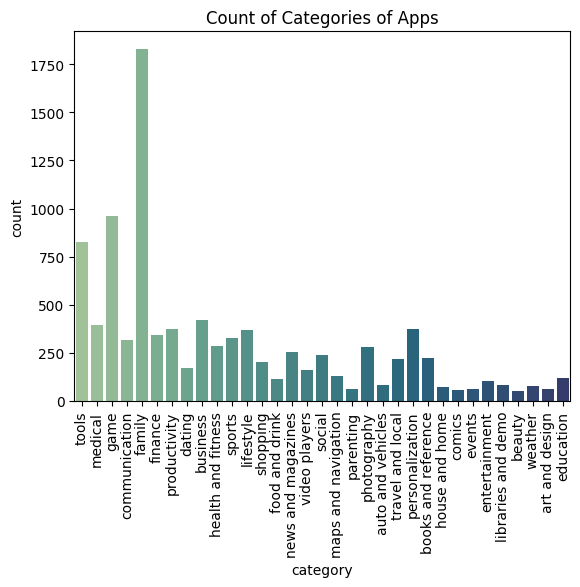

In [390]:
sns.countplot(x=df1['category'],palette="crest")
plt.title("Count of Categories of Apps")
plt.xticks(rotation=90)

Majority of the apps belong to the "family" category followed by games and tools.

<ipython-input-391-2a7d184019e6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_price_per_category'],y=df1['category'],palette="crest")


Text(0.5, 1.0, 'Average Prices in each Category')

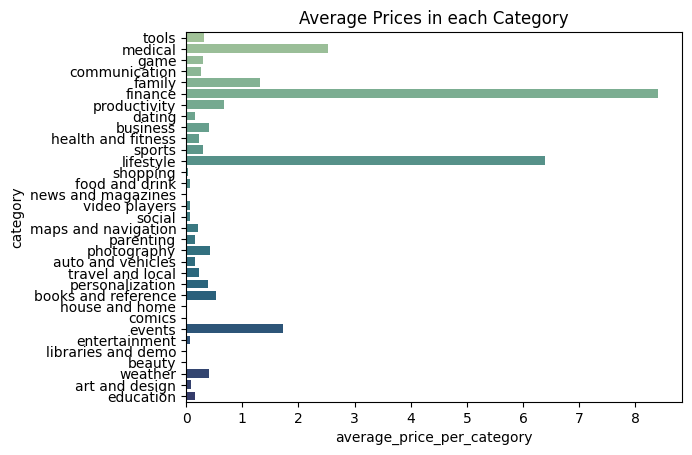

In [391]:
sns.barplot(x=df1['average_price_per_category'],y=df1['category'],palette="crest")
plt.title("Average Prices in each Category")

Finance, followed by lifestyle apps had the highest average prices among all categories

<ipython-input-392-4c046d68ef8f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_rating_per_category'],y=df1['category'],palette="crest")


Text(0.5, 1.0, 'Average Ratings in each Category')

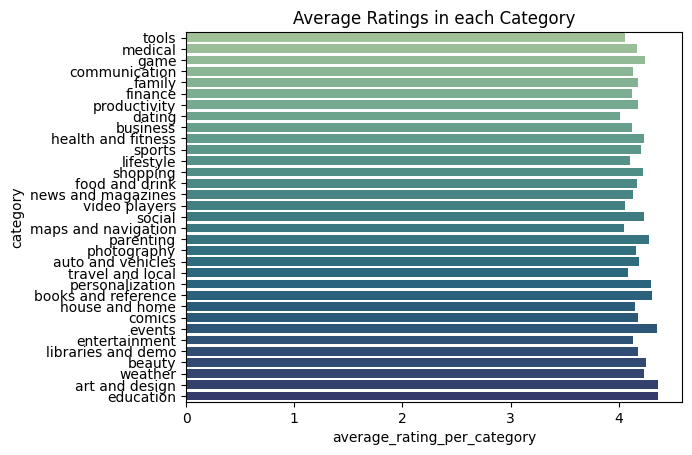

In [392]:
sns.barplot(x=df1['average_rating_per_category'],y=df1['category'],palette="crest")
plt.title("Average Ratings in each Category")

Art and design and education categories have the highest average ratings among all categories

<ipython-input-393-7b2d87816002>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_size_per_category'],y=df1['category'],palette="crest")


Text(0.5, 1.0, 'Average Sizes in each Category')

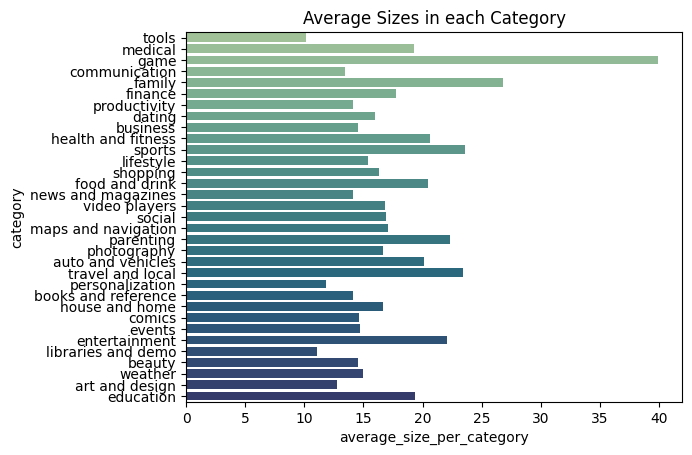

In [393]:
sns.barplot(x=df1['average_size_per_category'],y=df1['category'],palette="crest")
plt.title("Average Sizes in each Category")

Gaming apps, followed by family apps have the highest average size per category.

<ipython-input-394-7446ecf35e36>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_num_install_per_category'],y=df1['category'],palette="crest")


Text(0.5, 1.0, 'Average Number of Installations in each Category')

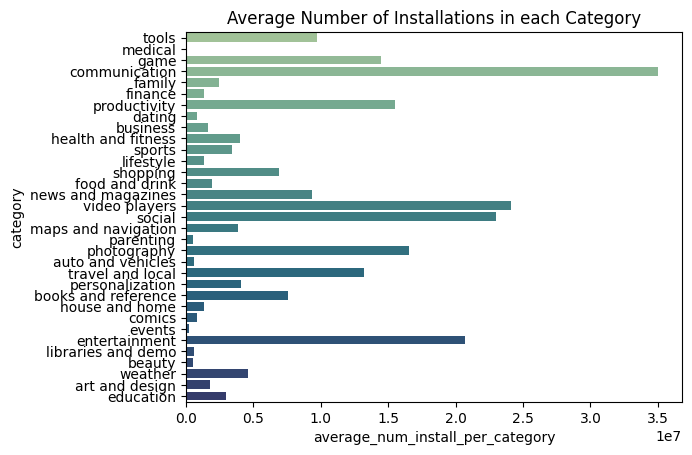

In [394]:
sns.barplot(x=df1['average_num_install_per_category'],y=df1['category'],palette="crest")
plt.title("Average Number of Installations in each Category")

Communication, followed by video players category has the highest average number of installations among all categories

Text(0.5, 1.0, 'Count of Types of Apps')

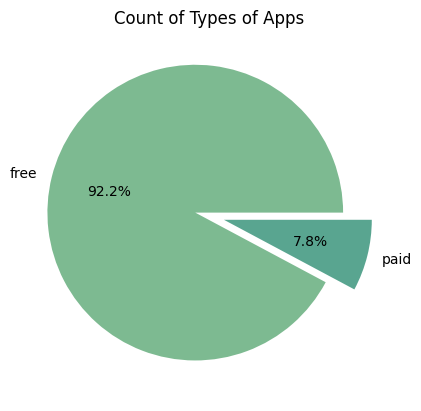

In [395]:
value_counts=df1['type'].value_counts()
explode=(0.1,0.1)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("crest"),autopct="%1.1f%%",explode=explode)
plt.title("Count of Types of Apps")

Majority of the apps listed are free to use

<ipython-input-396-2a5f04b96df4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df1['average_rating_per_type'],x=df1['type'],palette="crest")


Text(0.5, 1.0, 'Average Rating in each Type of App')

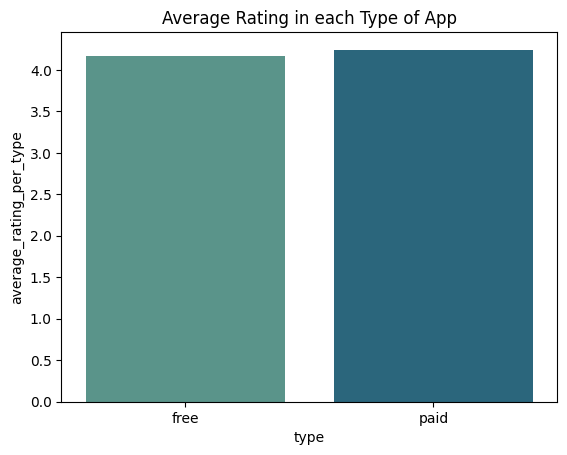

In [396]:
sns.barplot(y=df1['average_rating_per_type'],x=df1['type'],palette="crest")
plt.title("Average Rating in each Type of App")

The average rating given to paid type of apps is slightly higher than the average rating given to free apps.

<ipython-input-397-cc9463f68b4e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df1['average_size_per_type'],x=df1['type'],palette="crest")


Text(0.5, 1.0, 'Average Size in each Type of App')

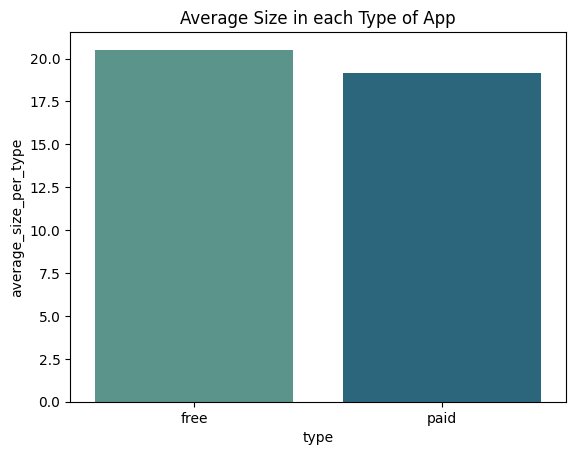

In [397]:
sns.barplot(y=df1['average_size_per_type'],x=df1['type'],palette="crest")
plt.title("Average Size in each Type of App")

Free apps occupy slightly more size on an average as compared to paid apps

<ipython-input-398-c78b67fc7fa1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_num_install_per_type'],y=df1['type'],palette="crest")


Text(0.5, 1.0, 'Average Number of Installations per Type of App')

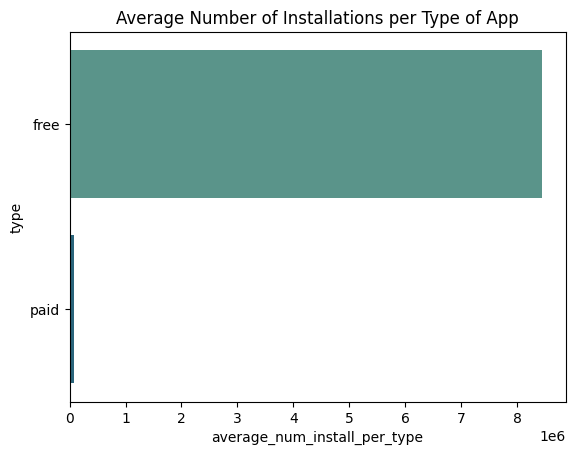

In [398]:
sns.barplot(x=df1['average_num_install_per_type'],y=df1['type'],palette="crest")
plt.title("Average Number of Installations per Type of App")

Average number of installations for free apps is far greater than the number of installations of paid apps

<ipython-input-422-34d1401bcfa8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['content_rating'],palette="crest")


Text(0.5, 1.0, 'Count of Content Rating of Apps')

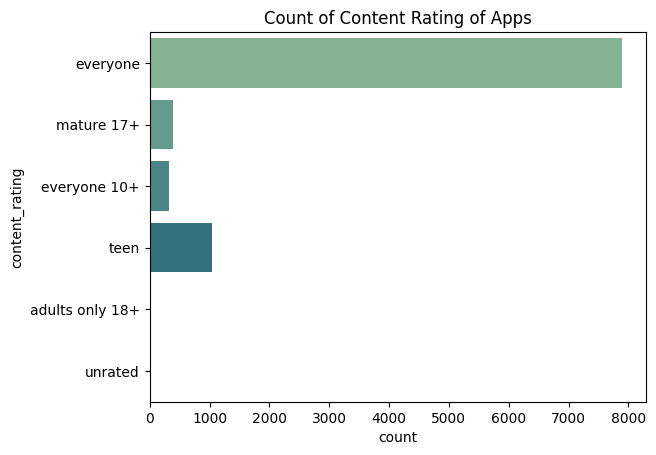

In [422]:
sns.countplot(y=df1['content_rating'],palette="crest")
plt.title("Count of Content Rating of Apps")

Most apps have "everyone" or suitable for all ages rating.

<ipython-input-423-ff234e9c919d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_price_per_content_rating'],y=df1['content_rating'],palette="crest")


Text(0.5, 1.0, 'Average Prices in each Content Rating')

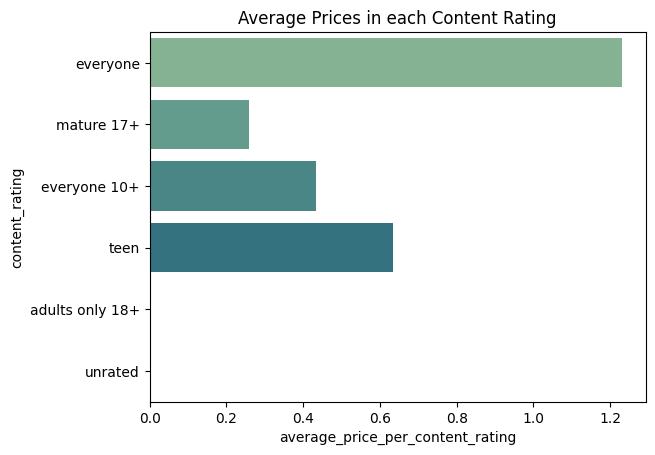

In [423]:
sns.barplot(x=df1['average_price_per_content_rating'],y=df1['content_rating'],palette="crest")
plt.title("Average Prices in each Content Rating")

The average price for apps with content rated for "everyone" is the highest, followed by "teen" rated apps.

<ipython-input-424-fba54f09370d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_size_per_content_rating'],y=df1['content_rating'],palette="crest")


Text(0.5, 1.0, 'Average Sizes in each Content Rating')

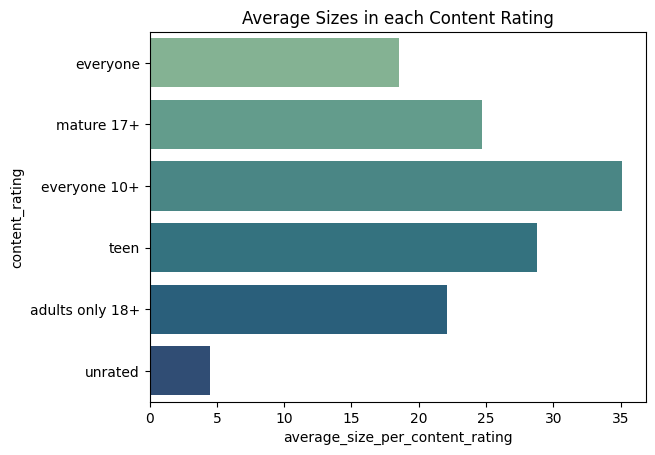

In [424]:
sns.barplot(x=df1['average_size_per_content_rating'],y=df1['content_rating'],palette="crest")
plt.title("Average Sizes in each Content Rating")

The average size occupied by apps having "everyone 10+" content rating is the highest, followed by "teen" content rating apps.

<ipython-input-426-9d127d079730>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['average_num_install_per_content_rating'],y=df1['content_rating'],palette="crest")


Text(0.5, 1.0, 'Average Number of Installations in each Content Rating')

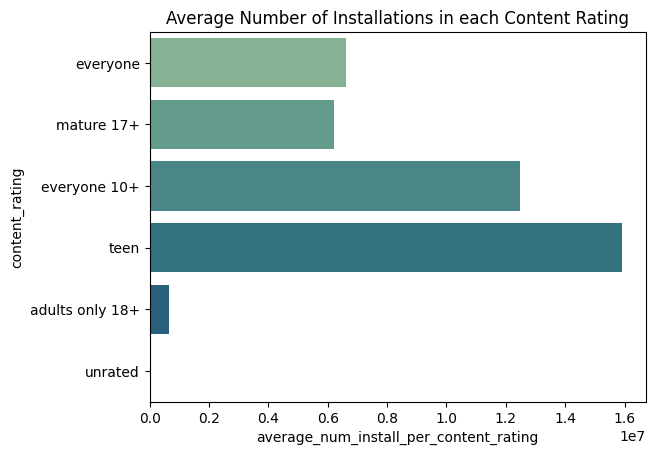

In [426]:
sns.barplot(x=df1['average_num_install_per_content_rating'],y=df1['content_rating'],palette="crest")
plt.title("Average Number of Installations in each Content Rating")

"Teen" content rating apps have the highest number of installations on an average , followed by "everyone 10+" content rating apps.

Text(0.5, 1.0, 'Comparison of Type and Content Rating of Apps')

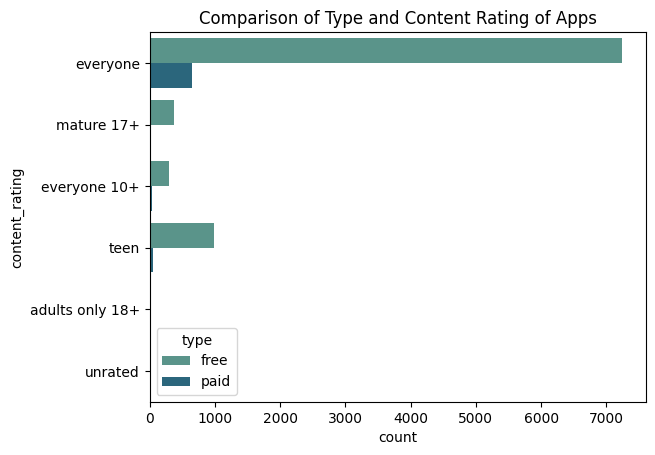

In [428]:
sns.countplot(y=df1['content_rating'],hue=df1['type'],palette="crest")
plt.title("Comparison of Type and Content Rating of Apps")

Majority of the free apps belong to the "everyone" category

In [405]:
stopwords=set(STOPWORDS)

In [406]:
comment_words=""

In [407]:
for val in df1.genres:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words=comment_words+" ".join(tokens)+" "

In [408]:
wordcloud=WordCloud(stopwords=stopwords, background_color="black",collocations=False,width=800,height=800,min_font_size=10).generate(comment_words)

Text(0.5, 1.0, 'Word Cloud of Genres')

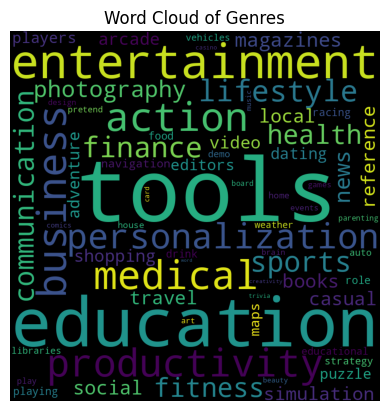

In [409]:
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Genres")

Tools, education and entertainment are the most commonly used words to describe the genre of apps

<Axes: xlabel='rating', ylabel='size'>

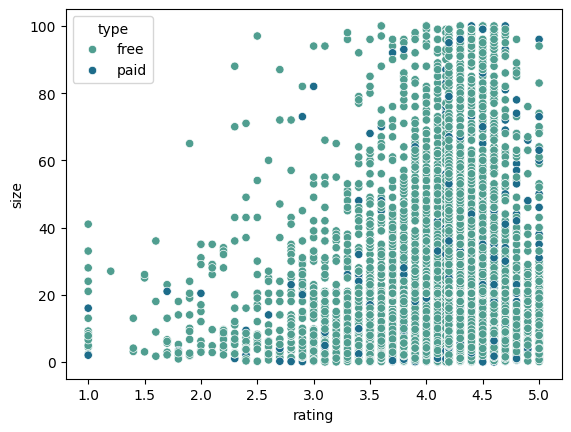

In [410]:
sns.scatterplot(x=df1['rating'],y=df1['size'],hue=df1['type'],palette="crest")

([<matplotlib.patches.Wedge at 0x7d27bbfa5840>,
 [Text(-0.91101351326321, 0.7018221844967736, 'positive'),
  Text(0.7069968634000939, -0.90700354748062, 'negative'),
  Text(1.1135990633780484, -0.2870489958936171, 'neutral')],
 [Text(-0.5149206814096404, 0.39668210428078504, '79.1%'),
  Text(0.3996069227913574, -0.5126541790107851, '12.9%'),
  Text(0.6294255575615055, -0.16224508463552267, '8.0%')])

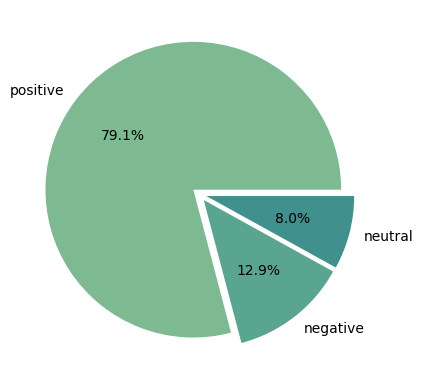

In [411]:
value_counts=df2['sentiment'].value_counts()
explode=(0.05,0.05,0.05)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("crest"),explode=explode,autopct="%1.1f%%")

Most of the reviews evoke a positive sentiment

([<matplotlib.patches.Wedge at 0x7d27bbe00c70>,
 [Text(-0.7263753861433621, 0.8915597559362367, 'subjective'),
  Text(0.726375386143362, -0.8915597559362368, 'objective')],
 [Text(-0.4105600008636393, 0.5039250794422206, '71.8%'),
  Text(0.41056000086363925, -0.5039250794422208, '28.2%')])

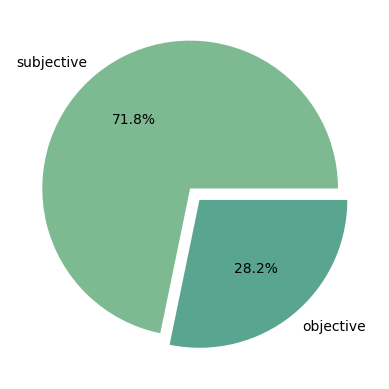

In [412]:
value_counts=df2['opinion_type'].value_counts()
explode=(0.05,0.05)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("crest"),explode=explode,autopct="%1.1f%%")

Most of the reviews are subjective in nature

In [413]:
comment_words=""

In [414]:
for val in df2.review_text:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words=comment_words+" ".join(tokens)+" "

In [415]:
wordcloud=WordCloud(stopwords=stopwords, background_color="black",width=1000,height=800,min_font_size=10,collocations=False).generate(comment_words)

Text(0.5, 1.0, 'Word Cloud of Reviews')

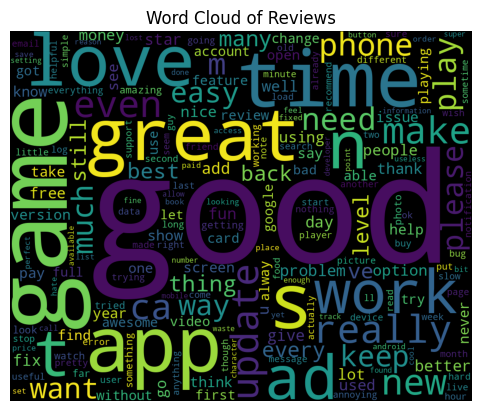

In [416]:
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Reviews")

Good, game, great are some of the most commonly used words in the reviews of apps

Text(0.5, 1.0, 'Distribution of subjectivity')

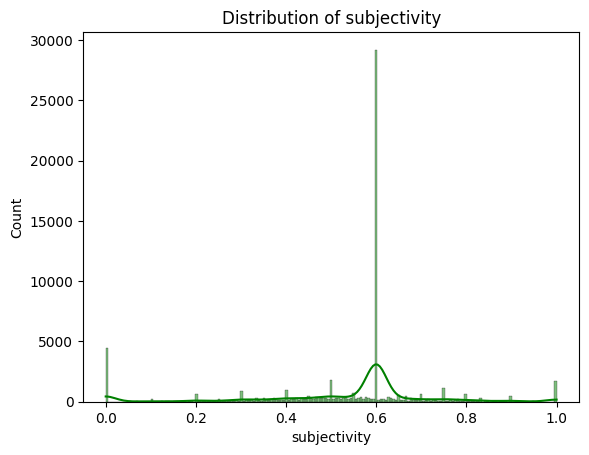

In [417]:
sns.histplot(x=df2['subjectivity'],color="green",kde=True)
plt.title("Distribution of subjectivity")

Text(0.5, 1.0, 'Distribution of polarity')

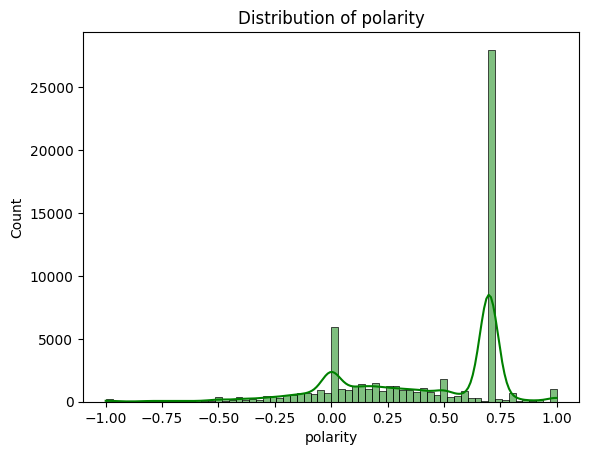

In [418]:
sns.histplot(x=df2['polarity'],color="green",kde=True)
plt.title("Distribution of polarity")

In [419]:
df=pd.merge(df1,df2,on="app_name",how="inner")

<ipython-input-420-4d86184f0909>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['rating'],x=df['sentiment'],palette="crest")


<Axes: xlabel='sentiment', ylabel='rating'>

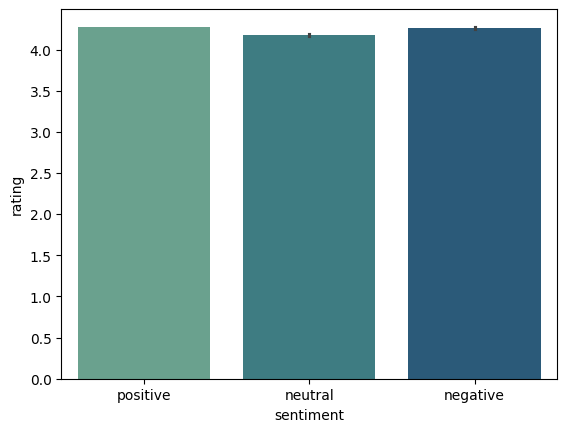

In [420]:
sns.barplot(y=df['rating'],x=df['sentiment'],palette="crest")

The ratings of each sentiment is almost same

<Axes: xlabel='sentiment', ylabel='count'>

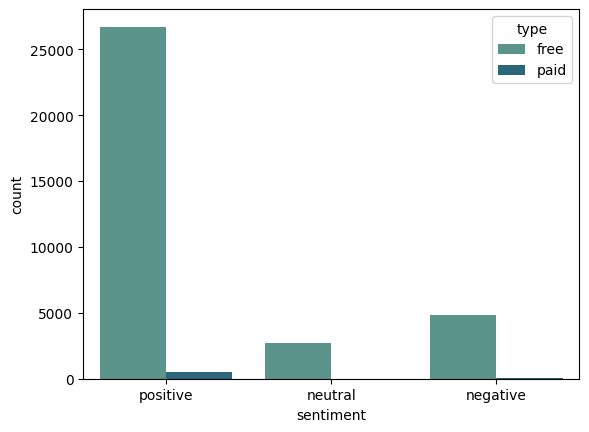

In [421]:
sns.countplot(x=df['sentiment'],hue=df['type'],palette="crest")

Majority of the positive sentiment in reviews for apps are given to free apps. Hardly any paid app is given neutral or negative review

**DATA ANALYSIS**

Here are the top 15 insights I have gathered from the visualizations:
1. Majority of the apps belong to the "family" category followed by games and tools.
2. The average rating of apps is 4.17
3. The average size of each app listed is 20.41 MB
4. Finance, followed by lifestyle apps had the highest average prices among all categories
5. Art and design and education categories have the highest average ratings among all categories
6. Gaming apps, followed by family apps have the highest average size per category.
7. Communication, followed by video players category has the highest average number of installations among all categories
8. Majority of the apps listed are free to use
9. Free apps occupy slightly more size on an average as compared to paid apps
10. Average number of installations for free apps is far greater than the number of installations of paid apps
11. Most apps have "everyone" or suitable for all ages rating.
12. Tools, education and entertainment are the most commonly used words to describe the genre of apps
13. Most of the reviews evoke a positive sentiment
14. Most of the reviews are subjective in nature
15. Good, game, great are some of the most commonly used words in the reviews of apps
